# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

1. Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 
2. Сгенерируйте из него выборку объёма 1000. 
3. Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).
4. **Ваша задача** — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. 
    - Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 
    - Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 
    - Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).
    
5. Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

**Review criteria**
 
Решение должно представлять собой IPython-ноутбук, содержащий:
- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

---

### 1. Возьмём гамма-распределение

[Гамма-распределение](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) - двухпараметрическое семейство абсолютно непрерывных распределений. Если параметр `alpha` принимает целое значение, то такое гамма-распределение также называется распределе́нием Эрла́нга.

Математическое ожидание и дисперсия случайной величины, имеющей гамма-распределение, имеют вид:
- математическое ожидание - `alpha * beta`
- дисперсия - `alpha * beta**2`

In [3]:
'''
The probability distribution function is:

            x ** (alpha - 1) * math.exp(-x / beta)
pdf(x) =  --------------------------------------
              math.gamma(alpha) * beta ** alpha
'''


'\nThe probability distribution function is:\n\n            x ** (alpha - 1) * math.exp(-x / beta)\npdf(x) =  --------------------------------------\n              math.gamma(alpha) * beta ** alpha\n'

In [4]:
import random
from math import gamma, exp, sqrt, log
import numpy as np
import matplotlib.pyplot as plt

### 2. Генерируем выборку объма 1000 

In [5]:
alpha=2.5
beta=2.5
sample = [random.gammavariate(alpha=alpha, beta=beta) for i in range(1000)]

In [6]:
# Расчитываем значения теоретической функции
x = np.arange(start=0.05, stop=20, step=20/1000)
theoretical_density = [xi ** (alpha - 1) * exp(-xi / beta)/(gamma(alpha) * beta ** alpha) for xi in x]

### 3. Гистограмма распределения и график теоретической плотности распределения случайной величины

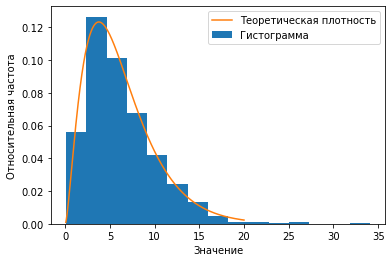

In [7]:
plt.hist(sample, density=True, bins=15)
plt.plot(x, theoretical_density)
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.legend(labels=['Теоретическая плотность', 'Гистограмма'])
plt.show()

### 4. Распределение выборочных средних при разных объёмах выборок

In [8]:
from statistics import mean, pstdev
import scipy.stats as sts

In [9]:
# Среднее значение и ст.откл нашей большой выборки из 1000 элементов. 
# Это оценка мат.ожидания и среднекв.отклонения теоретического распределения.
print(mean(sample))
print(pstdev(sample))

6.329241894062403
4.034449977549835


In [10]:
# Математическое ожидание случайной величины
expected_value = alpha * beta

# Дисперсия случайной величины
variance = alpha * beta**2

# Cтандартное отклонение
standard_deviation = sqrt(variance)

In [11]:
print('Мат.ожидание', expected_value)
print('Дисперсия:', variance)
print('Ст.откл.:', standard_deviation)

Мат.ожидание 6.25
Дисперсия: 15.625
Ст.откл.: 3.952847075210474


In [18]:
def make_means_distribution(population, n, k, population_ev, population_sd):
    """
    Функция для генерации k выборок размером n из генеральной совокупности population.
    
    population - генеральная соскупность
    n - размер выборки
    k - количество выборок
    population_ev - мат.ожидание генеральной совокупности
    population_sd - ст.отклонение генеральной совокупности
    
    Строит гистограмму распределения средних, вычисленных для каждой из k выборок размером n.
    Ничего не возвращает.
    """
    # создаём список со средними значениями выборок с n-элементами 
    means = [(mean(random.sample(population, n))) for i in range(k)]
    
    # теоретическое распределение средних
    norm_rv = sts.norm(population_ev, population_sd/sqrt(n))
    x = np.linspace(population_ev-2*population_sd,population_ev+2*population_sd,100)
    pdf = norm_rv.pdf(x)    
    
    plt.title(f'Распределение средних значений выборок размером {n}')
    plt.hist(means, density=True, label='Гистограмма\nраспределения\nсредних')
    plt.axvline(x=population_ev, color='orange', linestyle='--', label='Среднее\nген.совокупности\n')
    plt.plot(x, pdf, label='Теор.распределение\nсредних')
    plt.xlabel('Значение величины')
    plt.ylabel('Частота')
    # на том же графике построим теоретическую плотность распределения:

    plt.legend()
    plt.show()
    print(f'Среднее значение, вычисленное от средних: {round(mean(means), 2)}\n\n')

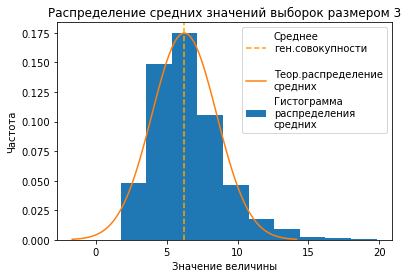

Среднее значение, вычисленное от средних: 6.5




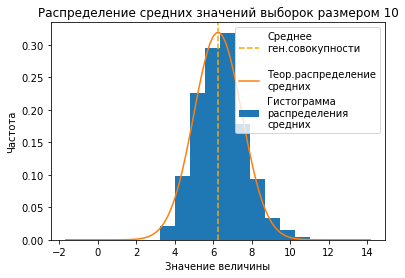

Среднее значение, вычисленное от средних: 6.4




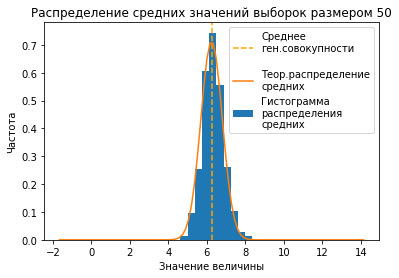

Среднее значение, вычисленное от средних: 6.33




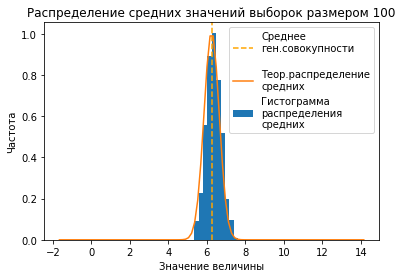

Среднее значение, вычисленное от средних: 6.36




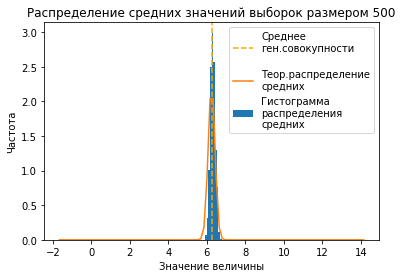

Среднее значение, вычисленное от средних: 6.32




In [19]:
# Выбираем из "ген.совокупности" по 1000 выборок разного размера (3, 10, 50, 100, 500)
for i in [3, 10, 50, 100, 500]:
    make_means_distribution(population=sample, n=i, k=1000,
                            population_ev=expected_value,
                            population_sd=standard_deviation)

### 5. Выводы 
1. С увеличением элементов в выборке средних распределение становится более кучным - уменьшаются стандартное отклонение и дисперия.
2. Оценка среднего значения генеральной совокупности (у нас это исходная выборка из 1000 значений) в каждом случае остаётся очень близкой к теоретическому значению 6.25.
3. Центральную предельную теорему можно применять и к гамма-распределению: она позволяет делать оценки среднего генеральной совокупности по выборочным статистикам.